In [9]:
from __future__ import print_function

from builtins import range
from builtins import object
import numpy as np
import matplotlib.pyplot as plt
try:
    xrange          # Python 2
except NameError:
    xrange = range  # Python 3



class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    N, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """



    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        np.random.seed(123)



    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two-layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2'] #shapes 10,3 -- 3
        N, D = X.shape


        # Compute the forward pass
        
        #############################################################################
        # TODO: Perform the forward pass, computing the class probabilities for the #
        # input. Store the result in the scores variable, which should be an array  #
        # of shape (N, C).                                                          #
        #############################################################################
        
        #structure of the list of parameters
        #tmp = [x*W, x*W+b1, a2, a2*W2, a2*W2+b2, a3]

        scores = []
        par = []
        for im in X:
            tmp = []
            res = im.dot(W1)
            z2 = res + b1 
            z2 = np.asarray(z2) 
            tmp.append(z2)
            a2 = np.where(z2 < 0, 0, z2)
            tmp.append(a2)

            res2 = a2.dot(W2)
            z3 = res2 + b2 
            z3 = np.asarray(z3) 
            
            a3 = np.exp(z3)/sum(np.exp(z3))
            tmp.append(a3)
            a3 = a3.tolist()
            scores.append(a3)
            par.append(tmp)

        scores = np.array(scores)

        pass


        # If the targets are not given then jump out, we're done
        if y is None:
            return scores

        # Compute the loss
            
        
        # Implement the loss for the softmax output layer
        
        #d1,d2 = W2.shape
        losses = []
        for i in range(len(scores)): 
            img = scores[i]
            cla = y[i]
            l = -np.log(img[cla])
            losses.append(l)

        loss = sum(losses)/len(losses)
        #loss =  np.sum(-np.log(scores[]))  / 5
        sq_norm1 = np.sum(np.sum(np.power(W1,2)))
        sq_norm2 = np.sum(np.sum(np.power(W2,2)))
        loss = loss + (reg * (sq_norm1 + sq_norm2))
        pass


        # Backward pass: compute gradients
        grads = {"W1": np.zeros((W1.shape[0],W1.shape[1])), 
                "W2": np.zeros((W2.shape[0],W2.shape[1])), 
                "b1": np.zeros(len(b1)), "b2": np.zeros(len(b2))}

        ##############################################################################
        # TODO: Implement the backward pass, computing the derivatives of the weights#
        # and biases. Store the results in the grads dictionary. For example,        #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size  #
        ##############################################################################

        
        #structure of the list of parameters
        #tmp = [x*W+b1, a2, a3] I also need loss
        index = 0
        for im in X:
            a3 = par[index][2]
            a2 = par[index][1]
            z2 = par[index][0]

            delta = np.zeros(len(b2)) #len(b2)= num of classes
            delta[y[index]] = 1
            
            dz3 = 1 * (1/N) * (a3 - delta)
            db2 = dz3
            dtmp = dz3
            dW2 = dtmp*a2[:, None]
            da2 = dtmp.dot(W2.T)

            grads["W2"] += dW2
            grads["b2"] += db2

            d = np.where(z2 < 0, 0, z2)
            d = np.where(d > 0, 1, d)
            dz2 = da2 * d
            db1 = dz2
            dtmp2 = dz2
            dW1 = dtmp2*im[:,None]
            #dx = dtmp2.dot(np.matrix.transpose(W1))

            grads["W1"] += dW1
            grads["b1"] += db1

            index += 1

        grads["W2"] += 2*reg*W2
        grads["W1"] += 2*reg*W1

        pass


        return loss, grads



    def train(self, X, y, X_val, y_val,
              learning_rate=1e-3, learning_rate_decay=0.95,
              reg=5e-6, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array of shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        
        num_train = X.shape[0]
        iterations_per_epoch = max( int(num_train // batch_size), 1)


        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in range(num_iters):
            X_batch = X
            y_batch = y

            #########################################################################
            # TODO: Create a random minibatch of training data and labels, storing  #
            # them in X_batch and y_batch respectively.                             #
            #########################################################################
            
            N, D = X.shape
            start_batch = np.random.randint(0,N)
            if start_batch + batch_size > N:
                fromm = start_batch - batch_size
                X_batch = X[fromm : start_batch,]
                y_batch = y[fromm : start_batch:]
            else:
                to = start_batch + batch_size
                X_batch = X[start_batch:to,]
                y_batch = y[start_batch:to]
            
            
            pass
        

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)

            #########################################################################
            # TODO: Use the gradients in the grads dictionary to update the         #
            # parameters of the network (stored in the dictionary self.params)      #
            # using stochastic gradient descent. You'll need to use the gradients   #
            # stored in the grads dictionary defined above.                         #
            #########################################################################
            
            
            self.params["W1"] -= learning_rate * grads["W1"]
            self.params["W2"] -= learning_rate * grads["W2"]
            self.params["b1"] -= learning_rate * grads["b1"]
            self.params["b2"] -= learning_rate * grads["b2"]
            
            pass
        

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

            # At every epoch check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }



    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        
        y_pred = []
        predictions = self.loss(X)
        for img_scores in predictions:
            p_class = np.where(img_scores == np.amax(img_scores))[0][0]
            y_pred.append(p_class)

        y_pred = np.asarray(y_pred)

        pass


        return y_pred




In [2]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [4]:
norm_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [5]:
from gradient_check import eval_numerical_gradient
from data_utils import get_CIFAR10_data
from vis_utils import visualize_grid

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


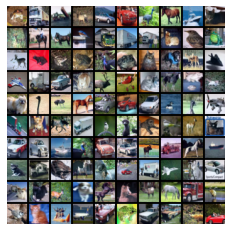

In [6]:
# Visualize some images to get a feel for the data
plt.figure(2)
plt.imshow(visualize_grid(X_train[:100, :].reshape(100, 32,32, 3), padding=3).astype('uint8'))
plt.gca().axis('off')
plt.show()


In [9]:
input_size = 32 * 32 * 3
hidden_size = 80
num_classes = 10
net2 = TwoLayerNet(input_size, hidden_size, num_classes)
# Train the network
stats = net2.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=400,
            learning_rate=0.002, learning_rate_decay=0.95,
            reg=0.0001, verbose=True)

# Predict on the validation set
val_acc = (net2.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302592
iteration 100 / 1000: loss 1.782309
iteration 200 / 1000: loss 1.571581
iteration 300 / 1000: loss 1.545567
iteration 400 / 1000: loss 1.481043
iteration 500 / 1000: loss 1.621163
iteration 600 / 1000: loss 1.447306
iteration 700 / 1000: loss 1.420295
iteration 800 / 1000: loss 1.378615
iteration 900 / 1000: loss 1.280308
Validation accuracy:  0.519


Text(0, 0.5, 'Loss')

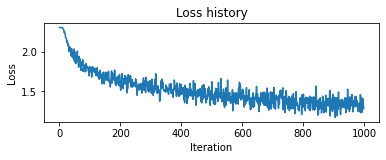

In [14]:
plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


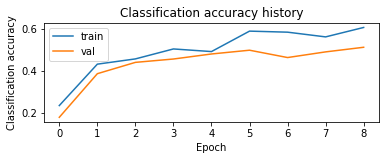

In [16]:
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

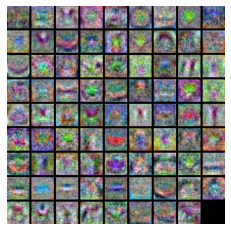

In [17]:
best_net = net2
plt.figure(6)
show_net_weights(best_net)

In [19]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.502


In [ ]:
lr =[0.001, 0.002, 0.003]
hidden_size=[20,40, 60, 80]
reg=[0.0001, 0.001, 0.003]
batch_size=[200, 300, 400, 500]
num_iters=1000
counter=0
totale_counter=len(lr)*len(hidden_size)*len(reg)*len(batch_size)
print("Combinazioni da provare:", totale_counter)
top=0
best_params=[]

for l_r in lr:
    for h_s in hidden_size:
        for rg in reg:
            for bs in batch_size:
                counter=counter+1
                net = TwoLayerNet(input_size, h_s, num_classes)
                print("percentuale fatta", counter/totale_counter*100,"%")
                print("Cominazione", counter, "/", totale_counter)
                
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=num_iters, batch_size=bs,
                            learning_rate=l_r, learning_rate_decay=0.95,
                            reg=rg, verbose=True)
                
                val_acc = (net.predict(X_val) == y_val).mean()

                print("Val accuracy->",val_acc)
                print("lr:",l_r, "Hidden:",h_s, "Reg:",rg, "Batch size:",bs)
                print("#################")

                if top==0 or top<val_acc:
                    top=val_acc
                    best_params=[l_r,h_s,rg, bs]
                else:
                    continue

print("Best combination:", best_params, "with accuracy:", top)
        

Combinazioni da provare: 144
percentuale fatta 0.6944444444444444 %
Cominazione 1 / 144
iteration 0 / 1000: loss 2.302592
iteration 100 / 1000: loss 1.946506
iteration 200 / 1000: loss 1.739507
iteration 300 / 1000: loss 1.586071
iteration 400 / 1000: loss 1.610630
iteration 500 / 1000: loss 1.621942
iteration 600 / 1000: loss 1.598153
iteration 700 / 1000: loss 1.603304
iteration 800 / 1000: loss 1.608856
iteration 900 / 1000: loss 1.470673
Val accuracy-> 0.456
lr: 0.001 Hidden: 20 Reg: 0.0001 Batch size: 200
#################
percentuale fatta 1.3888888888888888 %
Cominazione 2 / 144
iteration 0 / 1000: loss 2.302592
iteration 100 / 1000: loss 1.949347
iteration 200 / 1000: loss 1.730963
iteration 300 / 1000: loss 1.688271
iteration 400 / 1000: loss 1.611402
iteration 500 / 1000: loss 1.643838
iteration 600 / 1000: loss 1.598139
iteration 700 / 1000: loss 1.580465
iteration 800 / 1000: loss 1.574089
iteration 900 / 1000: loss 1.433601
Val accuracy-> 0.448
lr: 0.001 Hidden: 20 Reg: 0.

In [ ]:
print(top)
print(best_params)